# P1 Part A: Markov decision processes and Algorithms


# Q2

We want to modify the given policy iteration and value iteration code for a 5x5 grid environment. The rewards on the grid are specified in the image, and the starting state is at the top right (0,4), while the destination is at (2,0). The available actions are still Left, Top, Right, and Down.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

First, let's update the MDP_Environment class to reflect this 5x5 grid and its rewards.

In [3]:
class MDP_Environment:
    def __init__(self, rewards=None, shape=(5, 5)):
        # Initialize rewards for the 5x5 grid
        self.rewards = rewards if rewards is not None else [
            [-2, -2, -10, -10, -2],
            [2, -10, -10, -10, -2],
            [10, -2, -2, -2, -2],
            [-1, -1, -2, -5, -2],
            [-10, -2, -2, -1, -1]
        ]
        self.shape = shape
        self.S = np.zeros(self.shape)
        self.pi = np.ones(self.shape + (4,)) / 4
    
    def _get_reward(self, state):
        return self.rewards[state[0]][state[1]]
    
    def _get_new_state(self, state, action):
        i, j = state
        if action == 0:  # Left
            new_state = (i, max(0, j - 1))
        elif action == 1:  # Up
            new_state = (max(0, i - 1), j)
        elif action == 2:  # Right
            new_state = (i, min(self.shape[1] - 1, j + 1))
        elif action == 3:  # Down
            new_state = (min(self.shape[0] - 1, i + 1), j)
        return new_state
    
    def step(self, state, action):
        new_state = self._get_new_state(state, action)
        reward = self._get_reward(new_state)
        return new_state, reward
    
    def plot_states(self, title):
        fig, ax = plt.subplots(figsize=(8, 8))
        im = ax.imshow(self.S, cmap='coolwarm', interpolation='nearest')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Loop over data dimensions and create text annotations.
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                text = ax.text(j, i, f'{self.S[i, j]:.2f}',
                               ha="center", va="center", color="w")

        # Create colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        plt.show()

In [4]:
def policy_iteration(env, dis_factor, theta):
    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for i in range(env.shape[0]):
                for j in range(env.shape[1]):
                    v = env.S[i, j]
                    env.S[i, j] = max(env._get_reward((i, j)) + dis_factor * env.S[env._get_new_state((i, j), a)] for a in range(4))
                    delta = max(delta, abs(v - env.S[i, j]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for i in range(env.shape[0]):
            for j in range(env.shape[1]):
                current_action = np.argmax(env.pi[i, j])
                best_action_value = max([env._get_reward((i, j)) + dis_factor * env.S[env._get_new_state((i, j), a)] for a in range(4)])
                best_action = [env._get_reward((i, j)) + dis_factor * env.S[env._get_new_state((i, j), a)] for a in range(4)].index(best_action_value)
                if current_action != best_action:
                    policy_stable = False
                env.pi[i, j] = np.eye(4)[best_action]
        if policy_stable:
            break
    env.plot_states("Policy Iteration Value Function")

In [5]:
def value_iteration(env, dis_factor, theta):
    while True:
        delta = 0
        for i in range(env.shape[0]):
            for j in range(env.shape[1]):
                v = env.S[i, j]
                env.S[i, j] = max(env._get_reward((i, j)) + dis_factor * env.S[env._get_new_state((i, j), a)] for a in range(4))
                delta = max(delta, abs(v - env.S[i, j]))
        if delta < theta:
            break
    # Create a policy from the value function
    for i in range(env.shape[0]):
        for j in range(env.shape[1]):
            best_action_value = max([env._get_reward((i, j)) + dis_factor * env.S[env._get_new_state((i, j), a)] for a in range(4)])
            best_action = [env._get_reward((i, j)) + dis_factor * env.S[env._get_new_state((i, j), a)] for a in range(4)].index(best_action_value)
            env.pi[i, j] = np.eye(4)[best_action]
    env.plot_states("Value Iteration Value Function")


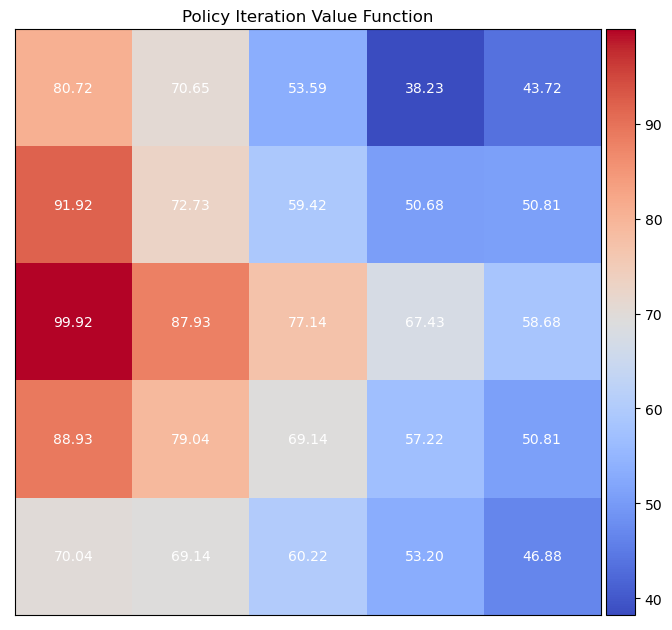

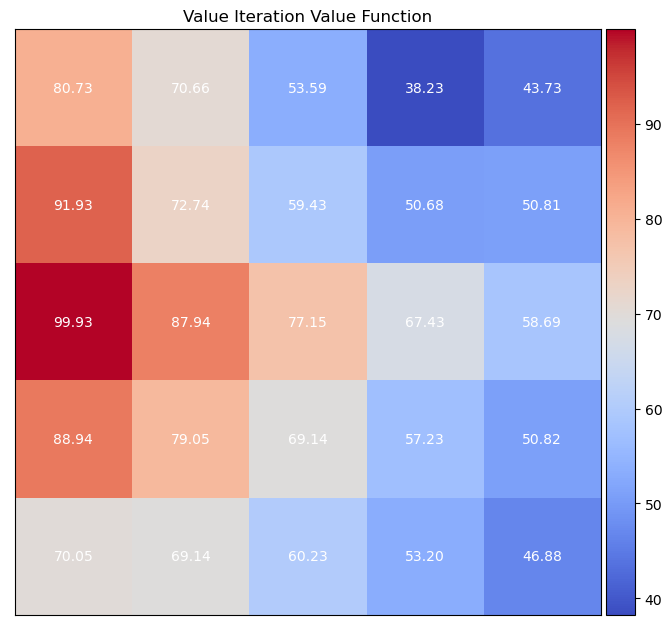

In [6]:

# Running the policy iteration and value iteration simulations
env = MDP_Environment()
policy_iteration(env, 0.9, 0.01)
value_iteration(env, 0.9, 0.01)
